In [1]:
%matplotlib inline
from operator import itemgetter
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
df=lambda x: pd.DataFrame(x)

In [2]:
oo=np.array([np.random.random_sample() for x in range(64)])

In [3]:
oo=oo.reshape([8,8])

In [4]:
df(oo)

,0,1,2,3,4,5,6,7
0,0.758712,0.244118,0.970029,0.098429,0.742530,0.119441,0.383786,0.215677
1,0.014468,0.728527,0.398069,0.681757,0.212436,0.470291,0.354671,0.937941
2,0.048175,0.675015,0.721274,0.964565,0.901043,0.403402,0.650767,0.209396
3,0.456551,0.459566,0.170456,0.524326,0.246128,0.012643,0.009475,0.479678
4,0.719056,0.642518,0.712252,0.602465,0.533440,0.963829,0.318315,0.317158
5,0.556159,0.064858,0.219315,0.727926,0.397644,0.787072,0.193681,0.815757
6,0.871911,0.727401,0.816466,0.360470,0.110320,0.867005,0.602430,0.578858
7,0.174233,0.261232,0.848878,0.465919,0.826880,0.664979,0.889450,0.384607


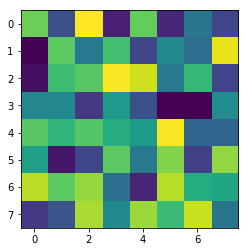

In [5]:
plt.imshow(oo)

In [6]:
import pandas as pd

In [7]:
rr=pd.read_excel('data/e-loc.xls')

In [8]:
#距离函数
import math
#a:(x,y)
def distance(a,b):
    return math.sqrt((a[0]-b[0])**2+(a[1]-b[1])**2)

In [9]:
#-全局变量
node=pd.read_csv('data/node.CSV',header=None)
node={name:(x,y) for i,(name,x,y) in node.iterrows()}

In [10]:
#表示坐标，单位km
node['F16']

(7, 105)

In [11]:
#-全局变量
edge=pd.read_csv('data/bian.CSV',header=None)
edge=[(f,t) for i,(f,t) in edge.iterrows()]

In [12]:
#表示边对
edge[2]

('F14', 'J27')

In [13]:
#主干道-全局变量
edge_zhu=pd.read_csv('data/bian-zhu.CSV',header=None)
edge_zhu=[(f,t) for i,(f,t) in edge_zhu.iterrows()]

In [14]:
#非主干道-全局变量
edge_nor=pd.read_csv('data/bian-nor.CSV',header=None)
edge_nor=[(f,t) for i,(f,t) in edge_nor.iterrows()]

In [15]:
len(edge_nor)+len(edge_zhu)==len(edge)

True

In [16]:
#表示边的距离，单位km，id按edge数组顺序
bianDist={i:(distance(node[e[0]],node[e[1]]),e[0],e[1]) for i,e in enumerate(edge)}

In [17]:
bianDist[0]

(11.40175425099138, 'F16', 'J27')

In [18]:
edgeDist={e[0]+e[1]:(distance(node[e[0]],node[e[1]]),e[0],e[1]) for i,e in enumerate(edge)}

In [ ]:
edgeDist

In [19]:
#最大，最小 距离
max([d for d,f,t in bianDist.values()]),min([d for d,f,t in bianDist.values()])

(40.26164427839479, 6.324555320336759)

In [20]:
import networkx as nx

In [21]:
#建立图模型-全局变量
G = nx.Graph()
G.add_nodes_from(list(node.keys()))
G.add_edges_from(edge_nor,{"主干道":False,"容量":1})
G.add_edges_from(edge_zhu,{"主干道":True,"容量":2})

In [22]:
for e in G.edges_iter():
    G.add_edge(e[0],e[1],{'物理距离':distance(node[e[0]],node[e[1]])})

In [23]:
#建立多边图模型
MG = nx.MultiGraph()
MG.add_nodes_from(list(node.keys()))
MG.add_edges_from(edge_nor,{"主干道":False})
MG.add_edges_from(edge_zhu,{"主干道":True})
MG.add_edges_from(edge_zhu,{"主干道":True})

In [24]:
len(G.edges())

174

In [25]:
len(edge_zhu)

18

In [26]:
len(MG.edges())

192

In [27]:
G备份=G.copy()

In [28]:
#导出可视化所需邻接表
s=nx.adjacency_matrix(G备份,G.nodes())
ss=pd.DataFrame(s.toarray(),index=G.nodes(),columns=G.nodes())
ss.to_excel("n2.xls")

In [219]:
#键值对式序列化库V1
PICKLE_PATH='./G备份.pick'
import shelve

def set_pickle(k='temp',v=''):
    with shelve.open(PICKLE_PATH) as file:
        file[k]=v

def get_pickle(k):
    if k is None:
        return False
    with shelve.open(PICKLE_PATH) as file:
        try:
            v=file[k]
        except KeyError:
            return None
        else:
            return v

In [30]:
set_pickle('v1',G备份)

In [31]:
#节点分类-全局变量
D,F,Z,J=[],[],[],[]
for i in G.nodes_iter():
    if i[0]=='D':
        D.append(i)
    if i[0]=='F':
        F.append(i)
    if i[0]=='Z':
        Z.append(i)
    if i[0]=='J':
        J.append(i)

In [32]:
for i in G.nodes_iter():
    if i[0]=='D':
        G.add_node(i,{'类型':'待机'})
    if i[0]=='F':
        G.add_node(i,{'类型':'发射'})
    if i[0]=='Z':
        G.add_node(i,{'类型':'转载'})
    if i[0]=='J':
        G.add_node(i,{'类型':'路口'})

In [33]:
#边属性读取
G.edge['J02']['D2']

{'主干道': False, '容量': 1, '物理距离': 40.26164427839479}

In [34]:
#MG边属性读取
MG.edge['J02']['D2']

{0: {'主干道': False}}

In [35]:
G['F19']

{'J28': {'主干道': False, '容量': 1, '物理距离': 8.06225774829855}}

In [36]:
#D1,D2需要一个路径表，分情况讨论
#物理距离前几-及对应 F
#结合车类型和道路类型耗时前几-及对应 F

#Z也需要，及对应 F

#从而追加参数 超级短路径(共现于 D-F,F-Z )
#以及 F-Z 这个路径表，存在两个方向的使用。 

In [37]:
#path,变成边组
def pathTuple(path):
    res=[]
    for i in range(len(path)-1):
        a,b=path[i:i+2]
        res.append((a,b))
    return res

In [38]:
#pathTuple(v)

In [39]:
#path,物理距离计算
def pathDistance(path):
    res=[]
    for i in range(len(path)-1):
        a,b=path[i:i+2]
        res.append(edgeDist.get(a+b)[0] if edgeDist.get(a+b,None) else edgeDist.get(b+a)[0])
    return sum(res)

In [40]:
#path,时间计算-全局式的
#car->"A","B","C"
def pathTime(path,car):
    res=[]
    veb=None
    for i in range(len(path)-1):
        a,b=path[i:i+2]
        dis=G.edge[a][b]['物理距离']
        if car == 'A':
            if G.edge[a][b]['主干道']:
                veb=70
            else:
                veb=45
        if car == 'B':
            if G.edge[a][b]['主干道']:
                veb=60
            else:
                veb=35
        if car == 'C':
            if G.edge[a][b]['主干道']:
                veb=50
            else:
                veb=30            
        tim=dis/veb
        res.append(tim)
    return sum(res)

In [ ]:
v

In [250]:
pathTime(v,'B')

3.5668569770459766

In [41]:
pathTime(edge[0],'B')

0.32576440717118227

In [246]:
pathDistance(v)

167.48062919492975

In [42]:
#D-F最短物理路径
#临时性算法优化：all_shortest_paths 迭代器版的最短路径
D_F={}
for d in D:
    D_F[d]={}
    for f in F:
        shorttemp=nx.shortest_path(G,source=d,target=f)
        D_F[d][f]=(shorttemp,nx.shortest_path_length(G,source=d,target=f),pathDistance(shorttemp))

In [720]:
#D-J最短物理路径
#临时性算法优化：all_shortest_paths 迭代器版的最短路径
D_J={}
for d in D:
    D_J[d]={}
    for j in J:
        shorttemp=nx.shortest_path(G,source=d,target=j)
        D_J[d][j]=(shorttemp,nx.shortest_path_length(G,source=d,target=j),pathDistance(shorttemp))

In [724]:
len(D_J['D2'])

62

In [44]:
#D-F权值化后最短 耗时路径 

#先算权
for e in G.edges_iter():
    dist=G.edge[e[0]][e[1]]['物理距离']
    if G.edge[e[0]][e[1]]['主干道']:
        veb=70
    else:
        veb=45
    G.add_edge(e[0],e[1],{'A车耗时':dist/veb})
    
    if G.edge[e[0]][e[1]]['主干道']:
        veb=60
    else:
        veb=35
    G.add_edge(e[0],e[1],{'B车耗时':dist/veb})
    
    if G.edge[e[0]][e[1]]['主干道']:
        veb=50
    else:
        veb=30 
    G.add_edge(e[0],e[1],{'C车耗时':dist/veb})

In [45]:
#A车
#再遍历
A_D_F={}
for d in D:
    A_D_F[d]={}
    for f in F:
        shorttemp=nx.shortest_path(G,source=d,target=f,weight="A车耗时")
        A_D_F[d][f]=(shorttemp,len(shorttemp),pathDistance(shorttemp),pathTime(shorttemp,'A'))

In [46]:
#B车
#再遍历
B_D_F={}
for d in D:
    B_D_F[d]={}
    for f in F:
        shorttemp=nx.shortest_path(G,source=d,target=f,weight="B车耗时")
        B_D_F[d][f]=(shorttemp,len(shorttemp),pathDistance(shorttemp),pathTime(shorttemp,'B'))

In [47]:
#C车
#再遍历
C_D_F={}
for d in D:
    C_D_F[d]={}
    for f in F:
        shorttemp=nx.shortest_path(G,source=d,target=f,weight="C车耗时")
        C_D_F[d][f]=(shorttemp,len(shorttemp),pathDistance(shorttemp),pathTime(shorttemp,'C'))

In [49]:
carA=["A"+str(i).zfill(2) for i in range(1,7)]
carB=["B"+str(i).zfill(2) for i in range(1,7)]
carC=["C"+str(i).zfill(2) for i in range(1,13)]

In [585]:
def alignLaunch(stage1):
    #寻找最慢车
    t=[(car,state["出发时刻"]+sum(state["D-F时序"]['耗时'].iloc[1:state["当前位置"]+1])) for car,state in stage1.items()]
    tdic={car:state["出发时刻"]+sum(state["D-F时序"]['耗时'].iloc[1:state["当前位置"]+1]) for car,state in stage1.items()}
    tz=max(t, key=lambda item: item[1])
    #计算耗时
    slowCar,slowTime=tz[0],tz[1]
    #每个车与它相减，获得对齐罚时
    for car,state in stage1.items():
        stage1[car]['D-F时序'].iloc[-1,-1]=slowTime-tdic[car]
    return stage1

In [ ]:
'''
def stage1Meeting(stage1):
    #终止计算条件-到达发射点了
    #同时过滤已经到发射点的车
    should,st=[],{}
    for car,state in stage1.items():
        a=state["D-F时序"]["位置"].iloc[state["当前位置"]+1]
        b=state["发射点"]
        if a!=b:
            should.append(car) 
    if len(should)==0:
        return stage1
    else:
    #装填过滤的车
        for i in should:
            st[i]=stage1[i]
    
    #耗时计算
    t=[(car,state["出发时刻"]+sum(state["D-F时序"]['耗时'].iloc[1:state["当前位置"]+1])) for car,state in st.items()]
    tdic={car:state["出发时刻"]+sum(state["D-F时序"]['耗时'].iloc[1:state["当前位置"]+1]) for car,state in st.items()}
    
    #t=sorted(t, key=lambda item: item[1])
    #fastCar,fastTime=t[0][0],t[0][1]
    tz=min(t, key=lambda item: item[1])
    fastCar,fastTime=tz[0],tz[1]
    
    #时间线比较
    tt=st[fastCar]["D-F时序"].iloc[st[fastCar]['当前位置']+2]
    if tt['类型'] != 'edge':
        print("出错了：001")
        return stage1
    ttt=tt["位置"]
    roadSize=G.edge[ttt[0]][ttt[1]]['容量']
    #时间线比较-之重叠
    meetingCars=[]
    for car,state in st.items():
        loc=state["D-F时序"]['位置'].iloc[state["当前位置"]]
        if set(ttt)==set(loc):
            meetingCars.append(car)
    if len(meetingCars)>=roadSize:
        #说明需要会车等待
        if len(meetingCars)>roadSize:
            print("出错了：002")
            return stage1
        #To-do 会车等待决策+1
        waitTime = min([tdic[i] for i in meetingCars]) - fastTime
        #写入等待时间
        stage1[fastCar]["D-F时序"].loc[stage1[fastCar]['当前位置']+1,'耗时']=waitTime
    stage1[fastCar]['当前位置']=stage1[fastCar]['当前位置']+2
    
    return stage1Meeting(stage1)    
'''

In [805]:
def stage1Meeting(stage1):
    #终止计算条件-到达发射点了
    #同时过滤已经到发射点的车
    should,st=[],{}
    for car,state in stage1.items():
        a=state["D-F时序"]["位置"].iloc[state["当前位置"]+1]
        b=state["发射点"]
        if a!=b:
            should.append(car) 
    if len(should)==0:
        return stage1
    else:
    #装填过滤的车
        for i in should:
            st[i]=stage1[i]
    
    #耗时计算
    t=[(car,state["出发时刻"]+sum(state["D-F时序"]['耗时'].iloc[1:state["当前位置"]+1])) for car,state in st.items()]
    tdic={car:state["出发时刻"]+sum(state["D-F时序"]['耗时'].iloc[1:state["当前位置"]+1]) for car,state in st.items()}
    
    #t=sorted(t, key=lambda item: item[1])
    #fastCar,fastTime=t[0][0],t[0][1]
    tz=min(t, key=lambda item: item[1])
    fastCar,fastTime=tz[0],tz[1]
    
    #时间线比较
    tt=st[fastCar]["D-F时序"].iloc[st[fastCar]['当前位置']+2]
    if tt['类型'] != 'edge':
        print("出错了：001")
        return stage1
    ttt=tt["位置"]
    roadSize=G.edge[ttt[0]][ttt[1]]['容量']
    #时间线比较-之重叠
    meetingCars=[]
    for car,state in st.items():
        loc=state["D-F时序"]['位置'].iloc[state["当前位置"]]
        if set(ttt)==set(loc):
            meetingCars.append(car)
    
    #计算其是否在区间时间范围内
    amtz=[]
    for car in meetingCars:
        a=sum(stage1[car]["D-F时序"]['耗时'].iloc[1:stage1[car]["当前位置"]+1])
        b=sum(stage1[car]["D-F时序"]['耗时'].iloc[1:stage1[car]["当前位置"]])

        if a <= fastTime and fastTime < b:
            amtz.append(car)
    meetingCars=amtz
    
    if len(meetingCars)>=roadSize:
        #说明需要会车等待
        if len(meetingCars)>roadSize:
            print(meetingCars)
            print("出错了：002")
            return stage1
        #To-do 会车等待决策+1
        waitTime = min([tdic[i] for i in meetingCars]) - fastTime
        #写入等待时间
        stage1[fastCar]["D-F时序"].loc[stage1[fastCar]['当前位置']+1,'耗时']=waitTime
    stage1[fastCar]['当前位置']=stage1[fastCar]['当前位置']+2
    
    return stage1Meeting(stage1)    

In [587]:
#D-F时序-生成
#car 表示ABC车型
def generDF(path,car):
    res=[]
    pathT=pathTuple(path)
    for i in range(len(pathT)):
        res.append(path[i])
        res.append(pathT[i])
    res.append(path[-1])
    return pd.DataFrame({"位置":res,
                         "耗时":[G.edge[i[0]][i[1]][car+'车耗时']*60 if type(i) is tuple else 0 for i in res],
                         "类型":["node" if type(i) is str else "edge" for i in res]
                        })

In [588]:
'''
目前权值是以小时为单位的，所以最终结果需要转为分钟 即 * 60  
d_f:表示所有24辆车的路径
{车号:path}
departure:表示每辆车的发车时间，出发时刻，分钟为单位
{车号:时刻}
'''
#波次1的耗时计算
def stage1Consum(d_f,departure):
    stage1={}
    for car,path in d_f.items():
        stage1[car]={
            "车型":car[0],
            "D-F时序":generDF(path,car[0]),
            "发射点":path[-1],
            "出发时刻":departure[car],
            "当前位置":1
        }
    #To-do:发车次序纠错
    #重叠计算
    newst1=stage1Meeting(stage1)#此处为范式，由于是可变式，所以newst1还是和原来的引用一样
    #齐射罚时
    newst1=alignLaunch(newst1)
    
    return newst1

In [589]:
#car 表示ABC车型
def generFZ(path,car):
    res=[]
    pathT=pathTuple(path)
    for i in range(len(pathT)):
        res.append(path[i])
        res.append(pathT[i])
    res.append(path[-1])
    return pd.DataFrame({"位置":res,
                         "耗时":[G.edge[i[0]][i[1]][car+'车耗时']*60 if type(i) is tuple else 0 for i in res],
                         "类型":["node" if type(i) is str else "edge" for i in res]
                        })

In [590]:
#car 表示ABC车型
def generZF(path,car):
    res=[]
    pathT=pathTuple(path)
    for i in range(len(pathT)):
        res.append(path[i])
        res.append(pathT[i])
    res.append(path[-1])
    return pd.DataFrame({"位置":res,
                         "耗时":[G.edge[i[0]][i[1]][car+'车耗时']*60 if type(i) is tuple else 0 for i in res],
                         "类型":["node" if type(i) is str else "edge" for i in res]
                        })

In [591]:
'''
def stage2Meeting(stage2):
    #终止条件-齐射
    should,st=[],{}
    for car,state in stage2.items():
        a=state["Z-F时序"]["位置"].iloc[state["当前Z-F位置"]+1]
        b=state["发射点"]
        if a!=b:
            should.append(car) 
    if len(should)==0:
        return stage2
    
    #过滤到达终点的
    #装填过滤的车
    for i in should:
        st[i]=stage2[i]
    
    #重叠检测
    #耗时计算
    t,tdic=[],{}
    for car,state in st.items():
        if state["转载完成"]:
            h=sum(state["Z-F时序"]['耗时'].iloc[1:state["当前Z-F位置"]+1])+sum(state["F-Z时序"]['耗时'].iloc[1:state["当前F-Z位置"]+1])
        else:
            h=sum(state["F-Z时序"]['耗时'].iloc[1:state["当前F-Z位置"]+1])
        t.append((car,h))
        tdic[car]=h
            
    #t=sorted(t, key=lambda item: item[1])
    #fastCar,fastTime=t[0][0],t[0][1]
    tz=min(t, key=lambda item: item[1])
    fastCar,fastTime=tz[0],tz[1]
    
    #时间线比较
    if st[fastCar]["转载完成"]:
        tt=st[fastCar]["Z-F时序"].iloc[st[fastCar]['当前Z-F位置']+2]
        if tt['类型'] != 'edge':
            print("出错了：003")
            return stage2
        ttt=tt["位置"]
        roadSize=G.edge[ttt[0]][ttt[1]]['容量']
        #时间线比较-之重叠
        meetingCars=[]
        for car,state in st.items():
            if state["转载完成"]:
                loc=state["Z-F时序"]['位置'].iloc[state["当前Z-F位置"]]
            else:
                loc=state["F-Z时序"]['位置'].iloc[state["当前F-Z位置"]]
            if set(ttt)==set(loc):
                meetingCars.append(car)
        if len(meetingCars)>=roadSize:
            #说明需要会车等待
            if len(meetingCars)>roadSize:
                print("出错了：004")
                return stage2
            #To-do 会车等待决策+1
            waitTime = min([tdic[i] for i in meetingCars]) - fastTime
            #写入等待时间
            stage2[fastCar]["Z-F时序"].loc[stage2[fastCar]['当前Z-F位置']+1,'耗时']=waitTime
        stage2[fastCar]['当前Z-F位置']=stage2[fastCar]['当前Z-F位置']+2
    else:
        tt=st[fastCar]["F-Z时序"].iloc[st[fastCar]['当前F-Z位置']+2]
        if tt['类型'] != 'edge':
            print("出错了：005")
            return stage2
        ttt=tt["位置"]
        roadSize=G.edge[ttt[0]][ttt[1]]['容量']
        #时间线比较-之重叠
        meetingCars=[]
        for car,state in st.items():
            if state["转载完成"]:
                loc=state["Z-F时序"]['位置'].iloc[state["当前Z-F位置"]]
            else:
                loc=state["F-Z时序"]['位置'].iloc[state["当前F-Z位置"]]
            if set(ttt)==set(loc):
                meetingCars.append(car)
        if len(meetingCars)>=roadSize:
            #说明需要会车等待
            if len(meetingCars)>roadSize:
                print("出错了：006")
                return stage2
            #To-do 会车等待决策+1
            waitTime = min([tdic[i] for i in meetingCars]) - fastTime
            #写入等待时间
            stage2[fastCar]["F-Z时序"].loc[stage2[fastCar]['当前F-Z位置']+1,'耗时']=waitTime
        #时间线比较-之转载爆仓
        zt=st[fastCar]["F-Z时序"].iloc[st[fastCar]['当前F-Z位置']+3]
        if zt['类型'] != 'node':
            print("出错了：007")
            return stage2
        if zt['位置'] == st[fastCar]['转载点']:
            #检测是否爆仓
            #所有是这个转载点的车
            #且到过转载点的
            stz=[car for car,state in stage2.items() if state["转载完成"] and state['转载点']==zt['位置']]
            ztTime=sum(st[fastCar]["F-Z时序"]['耗时'].iloc[1:st[fastCar]['当前F-Z位置']+2])
            #计算其是否在区间时间范围内
            stzz,mtz=[],[]
            for car in stz:
                a=sum(stage2[car]["F-Z时序"]['耗时'].iloc[1:-1])
                b=sum(stage2[car]["F-Z时序"]['耗时'].iloc[1:])
                if a <= ztTime and ztTime < b:
                    mtz.append(b)
                    stzz.append(car)
            #基础转载时间
            zz=10
            if len(stzz) >= 2:
                if len(stzz) > 2:
                    print("报错：特殊")
                #说明爆仓
                waitt=min(mtz)-ztTime
                stage2[fastCar]["F-Z时序"].loc[stage2[fastCar]['当前F-Z位置']+1,'耗时']=waitt
                #计算新的到达时间
                ztt=sum(st[fastCar]["F-Z时序"]['耗时'].iloc[1:st[fastCar]['当前F-Z位置']+2])
                zz+=max(mtz)-ztt
            #未爆仓，进场计算转载耗时
            if len(stzz) ==1:
                #表示存在正在转载物
                zz+=sum(stage2[stzz[0]]["F-Z时序"]['耗时'].iloc[1:])-ztTime
            #并写入转载完成和位置，转载时间
            stage2[fastCar]['转载完成']=True
            stage2[fastCar]['当前F-Z位置']=stage2[fastCar]['当前F-Z位置']+3
            stage2[fastCar]["F-Z时序"].loc[stage2[fastCar]['当前F-Z位置'],'耗时']=zz
        stage2[fastCar]['当前F-Z位置']=stage2[fastCar]['当前F-Z位置']+2

    return stage2Meeting(stage2)
''' 

In [806]:
def stage2Meeting(stage2):
    #终止条件-齐射
    should,st=[],{}
    for car,state in stage2.items():
        a=state["Z-F时序"]["位置"].iloc[state["当前Z-F位置"]+1]
        b=state["发射点"]
        if a!=b:
            should.append(car) 
    if len(should)==0:
        return stage2
    
    #过滤到达终点的
    #装填过滤的车
    for i in should:
        st[i]=stage2[i]
    
    #重叠检测
    #耗时计算
    t,tdic=[],{}
    for car,state in st.items():
        if state["转载完成"]:
            h=sum(state["Z-F时序"]['耗时'].iloc[1:state["当前Z-F位置"]+1])+sum(state["F-Z时序"]['耗时'].iloc[1:state["当前F-Z位置"]+1])
        else:
            h=sum(state["F-Z时序"]['耗时'].iloc[1:state["当前F-Z位置"]+1])
        t.append((car,h))
        tdic[car]=h
            
    #t=sorted(t, key=lambda item: item[1])
    #fastCar,fastTime=t[0][0],t[0][1]
    tz=min(t, key=lambda item: item[1])
    fastCar,fastTime=tz[0],tz[1]
    
    #时间线比较
    if st[fastCar]["转载完成"]:
        tt=st[fastCar]["Z-F时序"].iloc[st[fastCar]['当前Z-F位置']+2]
        if tt['类型'] != 'edge':
            print("出错了：003")
            return stage2
        ttt=tt["位置"]
        roadSize=G.edge[ttt[0]][ttt[1]]['容量']
        #时间线比较-之重叠
        meetingCars=[]
        for car,state in st.items():
            if state["转载完成"]:
                loc=state["Z-F时序"]['位置'].iloc[state["当前Z-F位置"]]
            else:
                loc=state["F-Z时序"]['位置'].iloc[state["当前F-Z位置"]]
            if set(ttt)==set(loc):
                meetingCars.append(car)
        
        #计算其是否在区间时间范围内
        amtz=[]
        for car in meetingCars:
            if state["转载完成"]:
                a=sum(stage2[car]["Z-F时序"]['耗时'].iloc[1:stage2[car]["当前Z-F位置"]+1])+sum(stage2[car]["F-Z时序"]['耗时'].iloc[1:stage2[car]["当前F-Z位置"]+1])
                b=sum(stage2[car]["Z-F时序"]['耗时'].iloc[1:stage2[car]["当前Z-F位置"]])+sum(stage2[car]["F-Z时序"]['耗时'].iloc[1:stage2[car]["当前F-Z位置"]+1])
            else:
                a=sum(stage2[car]["F-Z时序"]['耗时'].iloc[1:stage2[car]["当前F-Z位置"]+1])
                b=sum(stage2[car]["F-Z时序"]['耗时'].iloc[1:stage2[car]["当前F-Z位置"]])

            if a <= fastTime and fastTime < b:
                amtz.append(car)
        meetingCars=amtz
        
        if len(meetingCars)>=roadSize:
            #说明需要会车等待
            if len(meetingCars)>roadSize:
                print("出错了：004")
                return stage2
            #To-do 会车等待决策+1
            waitTime = min([tdic[i] for i in meetingCars]) - fastTime
            #写入等待时间
            stage2[fastCar]["Z-F时序"].loc[stage2[fastCar]['当前Z-F位置']+1,'耗时']=waitTime
        stage2[fastCar]['当前Z-F位置']=stage2[fastCar]['当前Z-F位置']+2
    else:
        tt=st[fastCar]["F-Z时序"].iloc[st[fastCar]['当前F-Z位置']+2]
        if tt['类型'] != 'edge':
            print("出错了：005")
            return stage2
        ttt=tt["位置"]
        roadSize=G.edge[ttt[0]][ttt[1]]['容量']
        #时间线比较-之重叠
        meetingCars=[]
        for car,state in st.items():
            if state["转载完成"]:
                loc=state["Z-F时序"]['位置'].iloc[state["当前Z-F位置"]]
            else:
                loc=state["F-Z时序"]['位置'].iloc[state["当前F-Z位置"]]
            if set(ttt)==set(loc):
                meetingCars.append(car)
        #计算其是否在区间时间范围内
        amtz=[]
        for car in meetingCars:
            if state["转载完成"]:
                a=sum(stage2[car]["Z-F时序"]['耗时'].iloc[1:stage2[car]["当前Z-F位置"]+1])+sum(stage2[car]["F-Z时序"]['耗时'].iloc[1:stage2[car]["当前F-Z位置"]+1])
                b=sum(stage2[car]["Z-F时序"]['耗时'].iloc[1:stage2[car]["当前Z-F位置"]])+sum(stage2[car]["F-Z时序"]['耗时'].iloc[1:stage2[car]["当前F-Z位置"]+1])
            else:
                a=sum(stage2[car]["F-Z时序"]['耗时'].iloc[1:stage2[car]["当前F-Z位置"]+1])
                b=sum(stage2[car]["F-Z时序"]['耗时'].iloc[1:stage2[car]["当前F-Z位置"]])

            if a <= fastTime and fastTime < b:
                amtz.append(car)
        meetingCars=amtz
        if len(meetingCars)>=roadSize:
            #说明需要会车等待
            if len(meetingCars)>roadSize:
                print(meetingCars)
                print("出错了：006")
                return stage2
            #To-do 会车等待决策+1
            waitTime = min([tdic[i] for i in meetingCars]) - fastTime
            #写入等待时间
            stage2[fastCar]["F-Z时序"].loc[stage2[fastCar]['当前F-Z位置']+1,'耗时']=waitTime
        #时间线比较-之转载爆仓
        zt=st[fastCar]["F-Z时序"].iloc[st[fastCar]['当前F-Z位置']+3]
        if zt['类型'] != 'node':
            print("出错了：007")
            return stage2
        if zt['位置'] == st[fastCar]['转载点']:
            #检测是否爆仓
            #所有是这个转载点的车
            #且到过转载点的
            stz=[car for car,state in stage2.items() if state["转载完成"] and state['转载点']==zt['位置']]
            ztTime=sum(st[fastCar]["F-Z时序"]['耗时'].iloc[1:st[fastCar]['当前F-Z位置']+2])
            #计算其是否在区间时间范围内
            stzz,mtz=[],[]
            for car in stz:
                a=sum(stage2[car]["F-Z时序"]['耗时'].iloc[1:-1])
                b=sum(stage2[car]["F-Z时序"]['耗时'].iloc[1:])
                if a <= ztTime and ztTime < b:
                    mtz.append(b)
                    stzz.append(car)
            #基础转载时间
            zz=10
            if len(stzz) >= 2:
                if len(stzz) > 2:
                    print("报错：特殊")
                #说明爆仓
                waitt=min(mtz)-ztTime
                stage2[fastCar]["F-Z时序"].loc[stage2[fastCar]['当前F-Z位置']+1,'耗时']=waitt
                #计算新的到达时间
                ztt=sum(st[fastCar]["F-Z时序"]['耗时'].iloc[1:st[fastCar]['当前F-Z位置']+2])
                zz+=max(mtz)-ztt
            #未爆仓，进场计算转载耗时
            if len(stzz) ==1:
                #表示存在正在转载物
                zz+=sum(stage2[stzz[0]]["F-Z时序"]['耗时'].iloc[1:])-ztTime
            #并写入转载完成和位置，转载时间
            stage2[fastCar]['转载完成']=True
            stage2[fastCar]['当前F-Z位置']=stage2[fastCar]['当前F-Z位置']+3
            stage2[fastCar]["F-Z时序"].loc[stage2[fastCar]['当前F-Z位置'],'耗时']=zz
        stage2[fastCar]['当前F-Z位置']=stage2[fastCar]['当前F-Z位置']+2

    return stage2Meeting(stage2)

In [592]:
'''
def alignLaunch2(stage2):
    #寻找最慢车
    t,tdic=[],{}
    for car,state in st.items():
        h=sum(state["Z-F时序"]['耗时'].iloc[1:state["当前Z-F位置"]+1])+sum(state["F-Z时序"]['耗时'].iloc[1:state["当前F-Z位置"]+1])
        t.append((car,h))
        tdic[car]=h
    tz=max(t, key=lambda item: item[1])
    #计算耗时
    slowCar,slowTime=tz[0],tz[1]
    #每个车与它相减，获得对齐罚时
    for car,state in stage2.items():
        stage2[car]['Z-F时序'].iloc[-1,-1]=slowTime-tdic[car]
    return stage2
'''
# 修改了第三行 st -> stage2
def alignLaunch2(stage2):
    #寻找最慢车
    t,tdic=[],{}
    for car,state in stage2.items():
        h=sum(state["Z-F时序"]['耗时'].iloc[1:state["当前Z-F位置"]+1])+sum(state["F-Z时序"]['耗时'].iloc[1:state["当前F-Z位置"]+1])
        t.append((car,h))
        tdic[car]=h
    tz=max(t, key=lambda item: item[1])
    #计算耗时
    slowCar,slowTime=tz[0],tz[1]
    #每个车与它相减，获得对齐罚时
    for car,state in stage2.items():
        stage2[car]['Z-F时序'].iloc[-1,-1]=slowTime-tdic[car]
    return stage2

In [593]:
'''
f_z:{车号:path}
z_f:{车号:path}
'''
def stage2Consum(f_z,z_f):
    stage2={}
    for car in f_z.keys():
        stage2[car]={
            "车型":car[0],
            "F-Z时序":generFZ(f_z[car],car[0]),
            "当前F-Z位置":1,
            "转载点":f_z[car][-1],
            "转载完成":False,
            "Z-F时序":generZF(z_f[car],car[0]),
            "当前Z-F位置":1,
            "发射点":z_f[car][-1]
        }
    #重叠计算-转载计算-转载爆仓问题？->中断所有到此 Z 的车辆
    newst2=stage2Meeting(stage2)#此处为范式，由于是可变式，所以newst1还是和原来的引用一样
    #齐射罚时
    newst2=alignLaunch2(newst2)
    
    return newst2

In [594]:
def allConsum(departure,d_f,f_z,z_f):
    stage1=stage1Consum(d_f,departure)
    stage2=stage2Consum(f_z,z_f)
    #计算总暴露时间(排除转载时间)
    allTime={car:state["出发时刻"]+sum(state["D-F时序"]['耗时'].iloc[1:]) for car,state in stage1.items()}
    for car,state in stage2.items():
        allTime[car]+=sum(state["Z-F时序"]['耗时'].iloc[1:-1])+sum(state["F-Z时序"]['耗时'].iloc[1:])
    
    res=sum([time for time in allTime.values()])
    
    return res,stage1,stage2

In [ ]:
'''
目前权值是以小时为单位的，所以最终结果需要转为分钟 即 * 60  
d_f:表示所有24辆车的路径
{车号:path}
departure:表示每辆车的发车时间，出发时刻，分钟为单位
{车号:时刻}
f_z:{车号:path}
z_f:{车号:path}
'''
departure,d_f,f_z,z_f={},{},{},{}
targetTime,stage1,stage2=allConsum(departure,d_f,f_z,z_f)

In [153]:
# C_D_F[d][f]=(shorttemp,len(shorttemp),pathDistance(shorttemp),pathTime(shorttemp,'C'))

In [61]:
A_D1=[]
i=0
for key, item in A_D_F['D1'].items():
    A_D1.append([item[-1],key])
    i += 1
    #print(item[0])
i

60

In [62]:
A_D2=[]
i=0
for key, item in A_D_F['D2'].items():
    A_D2.append([item[-1],key])
    i += 1
    #print(item[0])
i

60

In [ ]:
A_D1_1=sorted(A_D1, key=itemgetter(0), reverse=False)[:20]
A_D1_1

In [ ]:
A_D2_2=sorted(A_D2, key=itemgetter(0), reverse=False)[:20]
A_D2_2

In [65]:
A_L=[]
for item,key in A_D1_1:
    A_L.append(A_D_F['D1'][key])
for item,key in A_D2_2:
    A_L.append(A_D_F['D2'][key])

In [66]:
len(A_L)

40

In [ ]:
B_D1=[]
B_D2=[]
for key, item in B_D_F['D1'].items():
    B_D1.append([item[-1],key])
for key, item in B_D_F['D2'].items():
    B_D2.append([item[-1],key])
B_D1_1=sorted(B_D1, key=itemgetter(0), reverse=False)[:20]
B_D1_1

In [ ]:
B_D2_2=sorted(B_D2, key=itemgetter(0), reverse=False)[:20]
B_D2_2

In [69]:
B_L=[]
for item,key in B_D1_1:
    B_L.append(B_D_F['D1'][key])
for item,key in B_D2_2:
    B_L.append(B_D_F['D2'][key])

In [70]:
len(B_L)

40

In [ ]:
C_D1=[]
C_D2=[]
for key, item in C_D_F['D1'].items():
    C_D1.append([item[-1],key])
for key, item in C_D_F['D2'].items():
    C_D2.append([item[-1],key])
C_D1_1=sorted(C_D1, key=itemgetter(0), reverse=False)[:25]
C_D1_1

In [ ]:
C_D2_2=sorted(C_D2, key=itemgetter(0), reverse=False)[:25]
C_D2_2

In [73]:
C_L=[]
for item,key in C_D1_1:
    C_L.append(C_D_F['D1'][key])
for item,key in C_D2_2:
    C_L.append(C_D_F['D2'][key])

In [74]:
len(C_L)

50

In [75]:
A_D_F['D1']['F58']

(['D1', 'Z03', 'J61', 'F58'], 4, 73.50083559341081, 1.6333519020757958)

In [76]:
A_D_F['D2'].keys()

dict_keys(['F57', 'F29', 'F36', 'F18', 'F44', 'F56', 'F26', 'F28', 'F45', 'F54', 'F19', 'F27', 'F39', 'F31', 'F32', 'F24', 'F30', 'F53', 'F12', 'F20', 'F15', 'F07', 'F43', 'F14', 'F58', 'F42', 'F51', 'F40', 'F17', 'F05', 'F21', 'F48', 'F33', 'F50', 'F02', 'F38', 'F60', 'F34', 'F10', 'F22', 'F25', 'F06', 'F41', 'F35', 'F09', 'F23', 'F13', 'F16', 'F37', 'F03', 'F55', 'F52', 'F11', 'F01', 'F46', 'F08', 'F49', 'F47', 'F04', 'F59'])

In [77]:
len(B_D_F['D1'])

60

# 按耗时最短排序

In [616]:
A_L=sorted(A_L, key=itemgetter(3), reverse=False)
#A_L

In [617]:
B_L=sorted(B_L, key=itemgetter(3), reverse=False)
#B_L

In [618]:
C_L=sorted(C_L, key=itemgetter(3), reverse=False)
#C_L

In [ ]:
'''
目前权值是以小时为单位的，所以最终结果需要转为分钟 即 * 60  
d_f:表示所有24辆车的路径
{车号:path}
departure:表示每辆车的发车时间，出发时刻，分钟为单位
{车号:时刻}
f_z:{车号:path}
z_f:{车号:path}
'''
departure,d_f,f_z,z_f={},{},{},{}
targetTime,stage1,stage2=allConsum(departure,d_f,f_z,z_f)

In [808]:
d_f=dict()
d_f['A01']=['D2', 'J32', 'F24']
d_f['A02']=['D2', 'J12', 'J13', 'J21', 'F03']
d_f['A03']=['D2', 'J03', 'J48', 'F47']
d_f['A04']=['D1', 'J11', 'J46', 'F43']
d_f['A05']=['D1', 'J09', 'J08', 'J07', 'J06', 'J36', 'F29']
d_f['A06']=['D1', 'Z03', 'J61', 'F57']
d_f['B01']=['D2', 'J03', 'J02', 'J47', 'F45']
d_f['B02']=['D2', 'J03', 'J04', 'J05', 'J49', 'F49']
d_f['B03']=['D2', 'J12', 'J13', 'J21', 'F02']
d_f['B04']=['D2', 'J12', 'J13', 'J21', 'F01']
d_f['B05']=['D2', 'J03', 'J04', 'J05', 'J49', 'F48']
d_f['B06']=['D1', 'J10', 'J45', 'J42', 'J40', 'F38']
d_f['C01']=['D2', 'J32', 'J33', 'F25']
d_f['C02']=['D2', 'J32', 'J33', 'J34', 'F26']
d_f['C03']=['D2', 'J03', 'J04', 'J50', 'F50']
d_f['C04']=['D2', 'J12', 'J13', 'J14', 'J35', 'F27']
d_f['C05']=['D2', 'J12', 'J13', 'J14', 'J35', 'F28']
d_f['C06']=['D1', 'Z03', 'J61', 'F58']
d_f['C07']=['D1', 'J11', 'J46', 'J44', 'F42']
d_f['C08']=['D1', 'J11', 'J46', 'J44', 'F41']
d_f['C09']=['D2', 'J12', 'J13', 'J21', 'J22', 'F06']
d_f['C10']=['D2', 'J03', 'J04', 'J50', 'J53', 'F51']
d_f['C11']=['D2', 'J12', 'J13', 'J21', 'J22', 'F05']
d_f['C12']=['D1', 'J09', 'J08', 'J07', 'Z04', 'J38', 'F34']

In [809]:
#D2=[[key,item,tmp_1[key][1],tmp_1[key][1]-24.90872225635921] for key,item in d_f.items() if item[0]=='D2']

In [ ]:
D1=[[key,item,tmp_1[key][1],tmp_1[key][1]-30.08137112714261] for key,item in d_f.items() if item[0]=='D1']

In [ ]:
sorted(D1, key=itemgetter(2), reverse=False)

In [193]:
min([tim[2] for tim in D1]),min([tim[2] for tim in D2])

(30.08137112714261, 24.90872225635921)

In [718]:
name='Z03D1'
(edgeDist[name][0]/45)*60

49.6028673006354

In [109]:
if 'D2J32' not in edgeDist.keys():
    print('J32D2' in edgeDist.keys())

True


In [719]:
a='J03'
b='D1'
edgeDist.get(a+b)[0] if edgeDist.get(a+b,None) else edgeDist.get(b+a)[0]

TypeError: 'NoneType' object is not subscriptable

In [691]:
#path,物理距离计算
def pathDistance(path):
    res=[]
    for i in range(len(path)-1):
        a,b=path[i:i+2]
        res.append(edgeDist.get(a+b)[0] if edgeDist.get(a+b,None) else edgeDist.get(b+a)[0])
    return sum(res)

In [692]:
tmp_1=dict()
for key,item in d_f.items():
    if key[0]=='C':
        tmp_1[key]=[0]
        for i in range(len(item)-1):
            a,b=item[i:i+2]
            tmp_1[key].append((edgeDist.get(a+b)[0]/30)*60+tmp_1[key][i] if edgeDist.get(a+b,None) else (edgeDist.get(b+a)[0]/30)*60+tmp_1[key][i])
    if key[0]=='B':
        tmp_1[key]=[0]
        for i in range(len(item)-1):
            a,b=item[i:i+2]
            tmp_1[key].append((edgeDist.get(a+b)[0]/35)*60+tmp_1[key][i] if edgeDist.get(a+b,None) else (edgeDist.get(b+a)[0]/35)*60+tmp_1[key][i])
    if key[0]=='A':
        tmp_1[key]=[0]
        for i in range(len(item)-1):
            a,b=item[i:i+2]
            tmp_1[key].append((edgeDist.get(a+b)[0]/45)*60+tmp_1[key][i] if edgeDist.get(a+b,None) else (edgeDist.get(b+a)[0]/45)*60+tmp_1[key][i])

In [810]:
cc=dict()
cc['A01']=0
cc['A02']=0
cc['A03']=0
cc['A04']=0
cc['A05']=0
cc['A06']=0
cc['B01']=29
cc['B02']=29*2
cc['B03']=33*2
cc['B04']=33
cc['B05']=29*3
cc['B06']=0
cc['C01']=50
cc['C02']=25
cc['C03']=29*5
cc['C04']=33*4
cc['C05']=33*6
cc['C06']=50
cc['C07']=31
cc['C08']=31*2
cc['C09']=33*5
cc['C10']=29*4
cc['C11']=33*3
cc['C12']=44

In [811]:
'''
目前权值是以小时为单位的，所以最终结果需要转为分钟 即 * 60  
d_f:表示所有24辆车的路径
{车号:path}
departure:表示每辆车的发车时间，出发时刻，分钟为单位
{车号:时刻}
f_z:{车号:path}
z_f:{车号:path}
'''
#stage1=stage1Consum(d_f,tmp_1)
stage1=stage1Consum(d_f,cc)

In [754]:
set_pickle('stage_1',stage1)

In [812]:
stage1['A01']['D-F时序']

,位置,类型,耗时
0,D2,node,0.000000
1,"(D2, J32)",edge,24.908722
2,J32,node,0.000000
3,"(J32, F24)",edge,12.292726
4,F24,node,306.039729


In [697]:
#[car for car,state in stage1.items()]

In [699]:
d_f_2=dict()
Car_ty=[it2 for it1 in [carA,carB,carC] for it2 in it1]
for i in Car_ty:
    d_f_2[i]=None

In [700]:
B_L[0][0][-1],carC[11]

('F24', 'C12')

In [701]:
#d_f_2=dict()
jishu=dict()
F_node=["F"+str(i).zfill(2) for i in range(1,61)]
for i in F_node:
    jishu[i]=0
i_A=0
for item in A_L:
    if i_A > 5:break
    if jishu[item[0][-1]] == 0:
        d_f_2[carA[i_A]]=item[0]
        jishu[item[0][-1]] += 1
        i_A += 1
i_B=0
for item in B_L:
    if i_B > 5:break
    if jishu[item[0][-1]] == 0:
        d_f_2[carB[i_B]]=item[0]
        jishu[item[0][-1]] += 1
        i_B += 1
i_C=0
for item in C_L:
    if i_C > 11:break
    if jishu[item[0][-1]] == 0:
        d_f_2[carC[i_C]]=item[0]
        jishu[item[0][-1]] += 1
        i_C += 1
#d_f_2       

In [702]:
d_f_t=dict()
Car_ty=[it2 for it1 in [carA,carB,carC] for it2 in it1]
for i in Car_ty:
    d_f_t[i]=None

In [703]:
#tmp_d_f_t_D1=dict()
tmp_ji=dict()
for key,item in d_f_2.items():
        a,b=item[0:2]
        tmp_ji[a+b]=0
for key,item in d_f_2.items():
    if item[0]=='D1':
        a,b=item[0:2]
        tmp_ji[a+b] += 1
        if key[0]=='C':
            #d_f_t[key].append((edgeDist.get(a+b)[0]/30)*60*(tmp_ji[a+b]-1) if edgeDist.get(a+b,None) else (edgeDist.get(b+a)[0]/30)*60*(tmp_ji[a+b]-1))
            d_f_t[key]=[(edgeDist.get(a+b)[0]/30)*60*(tmp_ji[a+b]-1) if edgeDist.get(a+b,None) else (edgeDist.get(b+a)[0]/30)*60*(tmp_ji[a+b]-1)]
        if key[0]=='B':
            #d_f_t[key].append((edgeDist.get(a+b)[0]/30)*60*(tmp_ji[a+b]-1) if edgeDist.get(a+b,None) else (edgeDist.get(b+a)[0]/30)*60*(tmp_ji[a+b]-1))
            d_f_t[key]=[(edgeDist.get(a+b)[0]/35)*60*(tmp_ji[a+b]-1) if edgeDist.get(a+b,None) else (edgeDist.get(b+a)[0]/35)*60*(tmp_ji[a+b]-1)]
        if key[0]=='A':
            #d_f_t[key].append((edgeDist.get(a+b)[0]/30)*60*(tmp_ji[a+b]-1) if edgeDist.get(a+b,None) else (edgeDist.get(b+a)[0]/30)*60*(tmp_ji[a+b]-1))
            d_f_t[key]=[(edgeDist.get(a+b)[0]/45)*60*(tmp_ji[a+b]-1) if edgeDist.get(a+b,None) else (edgeDist.get(b+a)[0]/45)*60*(tmp_ji[a+b]-1)]
    if item[0]=='D2':
        a,b=item[0:2]
        tmp_ji[a+b] += 1
        if key[0]=='C':
            #d_f_t[key].append((edgeDist.get(a+b)[0]/30)*60*(tmp_ji[a+b]-1) if edgeDist.get(a+b,None) else (edgeDist.get(b+a)[0]/30)*60*(tmp_ji[a+b]-1))
            d_f_t[key]=[(edgeDist.get(a+b)[0]/30)*60*(tmp_ji[a+b]-1) if edgeDist.get(a+b,None) else (edgeDist.get(b+a)[0]/30)*60*(tmp_ji[a+b]-1)]
        if key[0]=='B':
            #d_f_t[key].append((edgeDist.get(a+b)[0]/30)*60*(tmp_ji[a+b]-1) if edgeDist.get(a+b,None) else (edgeDist.get(b+a)[0]/30)*60*(tmp_ji[a+b]-1))
            d_f_t[key]=[(edgeDist.get(a+b)[0]/35)*60*(tmp_ji[a+b]-1) if edgeDist.get(a+b,None) else (edgeDist.get(b+a)[0]/35)*60*(tmp_ji[a+b]-1)]
        if key[0]=='A':
            #d_f_t[key].append((edgeDist.get(a+b)[0]/30)*60*(tmp_ji[a+b]-1) if edgeDist.get(a+b,None) else (edgeDist.get(b+a)[0]/30)*60*(tmp_ji[a+b]-1))
            d_f_t[key]=[(edgeDist.get(a+b)[0]/45)*60*(tmp_ji[a+b]-1) if edgeDist.get(a+b,None) else (edgeDist.get(b+a)[0]/45)*60*(tmp_ji[a+b]-1)]
            
d_f_t

{'A01': [49.81744451271842],
 'A02': [24.90872225635921],
 'A03': [0.0],
 'A04': [30.08137112714261],
 'A05': [168.7601848778319],
 'A06': [196.88688235747054],
 'B01': [36.16289675953541],
 'B02': [0.0],
 'B03': [41.74558512646602],
 'B04': [166.98234050586407],
 'B05': [0.0],
 'B06': [180.81448379767704],
 'C01': [126.57013865837393],
 'C02': [168.7601848778319],
 'C03': [292.2190958852621],
 'C04': [243.51591323771842],
 'C05': [0.0],
 'C06': [74.4043009509531],
 'C07': [90.24411338142782],
 'C08': [0.0],
 'C09': [97.40636529508737],
 'C10': [84.38009243891595],
 'C11': [146.10954794263105],
 'C12': [340.92227853280576]}

In [704]:
test_stage1=stage1Consum(d_f_2,d_f_t)
#test_stage1

In [705]:
tmp_1=dict()
for key,item in d_f.items():
    if key[0]=='C':
        tmp_1[key]=[0]
        for i in range(len(item)-1):
            a,b=item[i:i+2]
            tmp_1[key].append((edgeDist.get(a+b)[0]/30)*60+tmp_1[key][i] if edgeDist.get(a+b,None) else (edgeDist.get(b+a)[0]/30)*60+tmp_1[key][i])
    if key[0]=='B':
        tmp_1[key]=[0]
        for i in range(len(item)-1):
            a,b=item[i:i+2]
            tmp_1[key].append((edgeDist.get(a+b)[0]/35)*60+tmp_1[key][i] if edgeDist.get(a+b,None) else (edgeDist.get(b+a)[0]/35)*60+tmp_1[key][i])
    if key[0]=='A':
        tmp_1[key]=[0]
        for i in range(len(item)-1):
            a,b=item[i:i+2]
            tmp_1[key].append((edgeDist.get(a+b)[0]/45)*60+tmp_1[key][i] if edgeDist.get(a+b,None) else (edgeDist.get(b+a)[0]/45)*60+tmp_1[key][i])

In [706]:
#f_z
#A车
#再遍历
A_F_Z={}
for f in F:
    A_F_Z[f]={}
    for z in Z:
        shorttemp=nx.shortest_path(G,source=f,target=z,weight="A车耗时")
        A_F_Z[f][z]=(shorttemp,len(shorttemp),pathDistance(shorttemp),pathTime(shorttemp,'A'))
#B车
#再遍历
B_F_Z={}
for f in F:
    B_F_Z[f]={}
    for z in Z:
        shorttemp=nx.shortest_path(G,source=f,target=z,weight="B车耗时")
        B_F_Z[f][z]=(shorttemp,len(shorttemp),pathDistance(shorttemp),pathTime(shorttemp,'B'))
#C车
#再遍历
C_F_Z={}
for f in F:
    C_F_Z[f]={}
    for z in Z:
        shorttemp=nx.shortest_path(G,source=f,target=z,weight="C车耗时")
        C_F_Z[f][z]=(shorttemp,len(shorttemp),pathDistance(shorttemp),pathTime(shorttemp,'C'))
#z_f
#A车
#再遍历
A_Z_F={}
for z in Z:
    A_Z_F[z]={}
    for f in F:
        shorttemp=nx.shortest_path(G,source=z,target=f,weight="A车耗时")
        A_Z_F[z][f]=(shorttemp,len(shorttemp),pathDistance(shorttemp),pathTime(shorttemp,'A'))
#B车
#再遍历
B_Z_F={}
for z in Z:
    B_Z_F[z]={}
    for f in F:
        shorttemp=nx.shortest_path(G,source=z,target=f,weight="B车耗时")
        B_Z_F[z][f]=(shorttemp,len(shorttemp),pathDistance(shorttemp),pathTime(shorttemp,'B'))
#C车
#再遍历
C_Z_F={}
for z in Z:
    C_Z_F[z]={}
    for f in F:
        shorttemp=nx.shortest_path(G,source=z,target=f,weight="C车耗时")
        C_Z_F[z][f]=(shorttemp,len(shorttemp),pathDistance(shorttemp),pathTime(shorttemp,'C'))

In [707]:
a=sorted([item for key,item in A_F_Z['F47'].items()], key=itemgetter(3), reverse=False)
[item[0]  for item in a]

[['F47', 'J48', 'Z01'],
 ['F47', 'J48', 'J03', 'J04', 'J05', 'J06', 'J51', 'Z02'],
 ['F47', 'J48', 'J03', 'J04', 'J05', 'J06', 'J07', 'Z04'],
 ['F47', 'J48', 'J03', 'J04', 'J05', 'J06', 'J51', 'Z02', 'J52', 'Z03'],
 ['F47', 'J48', 'J03', 'J32', 'J13', 'J14', 'J15', 'J16', 'Z06'],
 ['F47',
  'J48',
  'J03',
  'J04',
  'J05',
  'J06',
  'J07',
  'J08',
  'J09',
  'J45',
  'J44',
  'Z05']]

In [708]:
len(f_z_3)

24

In [709]:
jishu_z=dict()
Z_node=["Z"+str(i).zfill(2) for i in range(1,7)]
for i in Z_node:
    jishu_z[i]=0
def cre_f_z(d_f,jishu,A_F_Z,B_F_Z,C_F_Z):
    #f_z:{车号:path}
    f_z=dict()
    for key,item in d_f.items():
        if key[0]=='A':
            #A_F_Z[item[-1]]
            tmp = sorted([item2 for key2,item2 in A_F_Z[item[-1]].items()], key=itemgetter(3), reverse=False)
            tmp2 = [item3[0] for item3 in tmp]
            for f_z_li in tmp2:   
                if jishu_z[f_z_li[-1]]<4:
                    f_z[key]=f_z_li
                    jishu_z[f_z_li[-1]] += 1
                    break
        if key[0]=='B':
            #A_F_Z[item[-1]]
            tmp = sorted([item2 for key2,item2 in B_F_Z[item[-1]].items()], key=itemgetter(3), reverse=False)
            tmp2 = [item3[0] for item3 in tmp]
            for f_z_li in tmp2:   
                if jishu_z[f_z_li[-1]]<4:
                    f_z[key]=f_z_li
                    jishu_z[f_z_li[-1]] += 1
                    break
        if key[0]=='C':
            #A_F_Z[item[-1]]
            tmp = sorted([item2 for key2,item2 in C_F_Z[item[-1]].items()], key=itemgetter(3), reverse=False)
            tmp2 = [item3[0] for item3 in tmp]
            for f_z_li in tmp2:   
                if jishu_z[f_z_li[-1]]<4:
                    f_z[key]=f_z_li
                    jishu_z[f_z_li[-1]] += 1
                    break
    return f_z

In [710]:
'''
jishu=dict()
F_node=["F"+str(i).zfill(2) for i in range(1,61)]
for i in F_node:
    jishu[i]=0
for key,item in d_f.items():
    jishu[item[-1]] += 1 
'''

'\njishu=dict()\nF_node=["F"+str(i).zfill(2) for i in range(1,61)]\nfor i in F_node:\n    jishu[i]=0\nfor key,item in d_f.items():\n    jishu[item[-1]] += 1 \n'

In [527]:
#jishu

In [ ]:
'''
#z_f:{车号:path}
z_f=dict()
for key,item in f_z.items():
    if key[0]=='A':
        #A_F_Z[item[-1]]
        tmp = sorted([item2 for key2,item2 in A_Z_F[item[-1]].items()], key=itemgetter(3), reverse=False)
        tmp2 = [item3[0] for item3 in tmp]
        z_f[key]=tmp2[0]
    if key[0]=='B':
        #A_F_Z[item[-1]]
        tmp = sorted([item2 for key2,item2 in B_Z_F[item[-1]].items()], key=itemgetter(3), reverse=False)
        tmp2 = [item3[0] for item3 in tmp]
        z_f[key]=tmp2[0]
    if key[0]=='C':
        #A_F_Z[item[-1]]
        tmp = sorted([item2 for key2,item2 in C_Z_F[item[-1]].items()], key=itemgetter(3), reverse=False)
        tmp2 = [item3[0] for item3 in tmp]
        z_f[key]=tmp2[0]
'''    

In [711]:
def cre_z_f(f_z,jishu,A_Z_F,B_Z_F,C_Z_F):
    z_f=dict()
    for key,item in f_z.items():
        if key[0]=='A':
            #A_F_Z[item[-1]]
            tmp = sorted([item2 for key2,item2 in A_Z_F[item[-1]].items()], key=itemgetter(3), reverse=False)
            tmp2 = [item3[0] for item3 in tmp]
            for tmpp in tmp2:
                if jishu[tmpp[-1]]==0:
                    z_f[key]=tmpp
                    jishu[tmpp[-1]] += 1
                    break
        if key[0]=='B':
            #A_F_Z[item[-1]]
            tmp = sorted([item2 for key2,item2 in B_Z_F[item[-1]].items()], key=itemgetter(3), reverse=False)
            tmp2 = [item3[0] for item3 in tmp]
            for tmpp in tmp2:
                if jishu[tmpp[-1]]==0:
                    z_f[key]=tmpp
                    jishu[tmpp[-1]] += 1
                    break
        if key[0]=='C':
            #A_F_Z[item[-1]]
            tmp = sorted([item2 for key2,item2 in C_Z_F[item[-1]].items()], key=itemgetter(3), reverse=False)
            tmp2 = [item3[0] for item3 in tmp]
            for tmpp in tmp2:
                if jishu[tmpp[-1]]==0:
                    z_f[key]=tmpp
                    jishu[tmpp[-1]] += 1
                    break
    return z_f

In [667]:
f_z_3=cre_f_z(d_f_2,jishu,A_F_Z,B_F_Z,C_F_Z)
z_f_3=cre_z_f(f_z_3,jishu,A_Z_F,B_Z_F,C_Z_F)

In [535]:
f_z_2=cre_f_z(d_f_2,jishu,A_F_Z,B_F_Z,C_F_Z)
z_f_2=cre_z_f(f_z_2,jishu,A_Z_F,B_Z_F,C_Z_F)

In [712]:
f_z=cre_f_z(d_f,jishu,A_F_Z,B_F_Z,C_F_Z)
z_f=cre_z_f(f_z,jishu,A_Z_F,B_Z_F,C_Z_F)

In [ ]:
targetTime,stage1,stage2=allConsum(d_f_t,d_f_2,f_z_3,z_f_3)

In [669]:
zx = stage2Consum(f_z_2,z_f_2)

出错了：006


In [798]:
dataset=dict()
Car_ty=[it2 for it1 in [carA,carB,carC] for it2 in it1]
for i in Car_ty:
    dataset[i]=[]
#dataset

In [799]:
for key,item in d_f_2.items():
    dataset[key].append(item)
for key,item in f_z_3.items():
    dataset[key].append(item)
for key,item in z_f_3.items():
    dataset[key].append(item)

In [801]:
F=open('dataset.pkl','wb')
import pickle
pickle.dump(dataset,F)
F.close()

In [765]:
set_pickle('targetTime',targetTime)

In [750]:
stage2['C01']['Z-F时序']

,位置,类型,耗时
0,Z02,node,0.000000
1,"(Z02, J51)",edge,23.323808
2,J51,node,0.000000
3,"(J51, J06)",edge,16.970563
4,J06,node,0.000000
5,"(J06, J07)",edge,32.310989
6,J07,node,0.000000
7,"(J07, Z04)",edge,31.622777
8,Z04,node,0.000000
9,"(Z04, J37)",edge,28.284271


In [671]:
test_stage1=stage1Consum(d_f_2,d_f_t)
test_stage1['A01']['D-F时序']

,位置,类型,耗时
0,D2,node,0.000000
1,"(D2, J32)",edge,24.908722
2,J32,node,0.000000
3,"(J32, F24)",edge,12.292726
4,F24,node,432.178056


In [687]:
f_z

{}

In [813]:
targetTime,stage1,stage2=allConsum(cc,d_f,f_z,z_f)

In [816]:
stage1['C01']['D-F时序']

,位置,类型,耗时
0,D2,node,0.000000
1,"(D2, J32)",edge,37.363083
2,J32,node,0.000000
3,"(J32, J33)",edge,34.000000
4,J33,node,0.000000
5,"(J33, F25)",edge,20.396078
6,F25,node,201.482016


In [817]:
stage2['C01']['F-Z时序']

,位置,类型,耗时
0,F25,node,0.000000
1,"(F25, J33)",edge,20.396078
2,J33,node,0.000000
3,"(J33, J04)",edge,39.698866
4,J04,node,0.000000
5,"(J04, J05)",edge,25.056736
6,J05,node,0.000000
7,"(J05, J06)",edge,38.418745
8,J06,node,0.000000
9,"(J06, J51)",edge,16.970563


In [818]:
stage2['C01']['Z-F时序']

,位置,类型,耗时
0,Z02,node,0.000000
1,"(Z02, J51)",edge,23.323808
2,J51,node,0.000000
3,"(J51, J06)",edge,16.970563
4,J06,node,0.000000
5,"(J06, J07)",edge,32.310989
6,J07,node,0.000000
7,"(J07, Z04)",edge,31.622777
8,Z04,node,0.000000
9,"(Z04, J37)",edge,28.284271


In [548]:
t_f_z_2_z_f_2=dict()
for key,item in f_z_2.items():
    if key[0]=='C':
        t_f_z_2_z_f_2[key]=[0]
        for i in range(len(item)-1):
            a,b=item[i:i+2]
            t_f_z_2_z_f_2[key].append((edgeDist.get(a+b)[0]/30)*60+t_f_z_2_z_f_2[key][i] if edgeDist.get(a+b,None) else (edgeDist.get(b+a)[0]/30)*60+t_f_z_2_z_f_2[key][i])
    if key[0]=='B':
        t_f_z_2_z_f_2[key]=[0]
        for i in range(len(item)-1):
            a,b=item[i:i+2]
            t_f_z_2_z_f_2[key].append((edgeDist.get(a+b)[0]/35)*60+t_f_z_2_z_f_2[key][i] if edgeDist.get(a+b,None) else (edgeDist.get(b+a)[0]/35)*60+t_f_z_2_z_f_2[key][i])
    if key[0]=='A':
        t_f_z_2_z_f_2[key]=[0]
        for i in range(len(item)-1):
            a,b=item[i:i+2]
            t_f_z_2_z_f_2[key].append((edgeDist.get(a+b)[0]/45)*60+t_f_z_2_z_f_2[key][i] if edgeDist.get(a+b,None) else (edgeDist.get(b+a)[0]/45)*60+t_f_z_2_z_f_2[key][i])
for key,item in z_f_2.items():
    if key[0]=='C':
        #t_f_z_2_z_f_2[key]=[0]
        for i in range(len(item)-1):
            a,b=item[i:i+2]
            t_f_z_2_z_f_2[key].append((edgeDist.get(a+b)[0]/30)*60+t_f_z_2_z_f_2[key][-1] if edgeDist.get(a+b,None) else (edgeDist.get(b+a)[0]/30)*60+t_f_z_2_z_f_2[key][-1])
    if key[0]=='B':
        #t_f_z_2_z_f_2[key]=[0]
        for i in range(len(item)-1):
            a,b=item[i:i+2]
            t_f_z_2_z_f_2[key].append((edgeDist.get(a+b)[0]/35)*60+t_f_z_2_z_f_2[key][-1] if edgeDist.get(a+b,None) else (edgeDist.get(b+a)[0]/35)*60+t_f_z_2_z_f_2[key][-1])
    if key[0]=='A':
        #t_f_z_2_z_f_2[key]=[0]
        for i in range(len(item)-1):
            a,b=item[i:i+2]
            t_f_z_2_z_f_2[key].append((edgeDist.get(a+b)[0]/45)*60+t_f_z_2_z_f_2[key][-1] if edgeDist.get(a+b,None) else (edgeDist.get(b+a)[0]/45)*60+t_f_z_2_z_f_2[key][-1])

In [725]:
#

In [728]:
D_J['D1']['J18']

(['D1', 'J11', 'J46', 'J44', 'J43', 'J19', 'J18'], 6, 129.40031185804548)

In [729]:
D_J['D1']['J25']

(['D1', 'Z03', 'J52', 'J07', 'Z04', 'J37', 'J15', 'J25'], 7, 150.4278328166322)

In [730]:
D_J['D1']['J07']

(['D1', 'Z03', 'J52', 'J07'], 3, 82.83779260202925)

In [731]:
D_J['D1']['J53']

(['D1', 'Z03', 'J57', 'J54', 'J55', 'J53'], 5, 103.96324748278526)

In [732]:
D_J['D1']['J03']

(['D1', 'Z03', 'J52', 'J07', 'J06', 'J05', 'J04', 'J03'],
 7,
 187.49933553943555)

In [734]:
D_J['D2']['J18']

(['D2', 'J12', 'J13', 'J14', 'J15', 'J16', 'J17', 'J18'],
 7,
 174.62596129135164)

In [735]:
D_J['D2']['J25']

(['D2', 'J12', 'J13', 'J14', 'J15', 'J25'], 5, 124.67746581242166)

In [736]:
D_J['D2']['J07']

(['D2', 'J03', 'J04', 'J05', 'J06', 'J07'], 5, 125.7565660471353)

In [737]:
D_J['D2']['J53']

(['D2', 'J03', 'J04', 'J50', 'J53'], 4, 86.60630642810922)

In [738]:
D_J['D2']['J03']

(['D2', 'J03'], 1, 21.095023109728988)

In [743]:
j18=30
j07=33
j03=24
j53=23
j25=20
bc03=0.10531649816661783
bc07=0.16348247371594035
bc18=0.06888039599703841
bc25=0.1605168725931167
bc53=0.1356498927810701

In [744]:
def p(j,bc):
    return j*math.log(1+bc)

In [746]:
p03=p(j03,bc03)
p07=p(j07,bc07)
p18=p(j18,bc18)
p25=p(j25,bc25)
p53=p(j53,bc53)

In [749]:
p03,p07,p18,p25,p53

(2.4031612233235675,
 4.996782127627859,
 1.9983522533074047,
 2.9773097139743148,
 2.9257168359367003)